# CSE 144 Group 3: Spotify Dataset Music Recommendation Project

## Import Data & Useful Libraries and Modules

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('spotify_dataset/data.csv')

len(data)
res.info()


AttributeError: 'list' object has no attribute 'info'

## Data Pre-Processing

In [ ]:
data["artists"]=data["artists"].str.replace("[", "")
data["artists"]=data["artists"].str.replace("]", "")
data["artists"]=data["artists"].str.replace("'", "")
data["artists"] = data["artists"].map(lambda row: row.split(', '))

data['duration_minutes'] = (data['duration_ms'] / 60000).round(2)
# Convert milliseconds to minutes and seconds
data.drop('duration_ms', axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   energy            170653 non-null  float64
 6   explicit          170653 non-null  int64  
 7   id                170653 non-null  object 
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_minutes
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86
1,0.9630,1921,0.732,[Dennis Day],0.819,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33
3,0.1650,1921,0.967,[Frank Parker],0.275,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50
4,0.2530,1921,0.957,[Phil Regan],0.418,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78


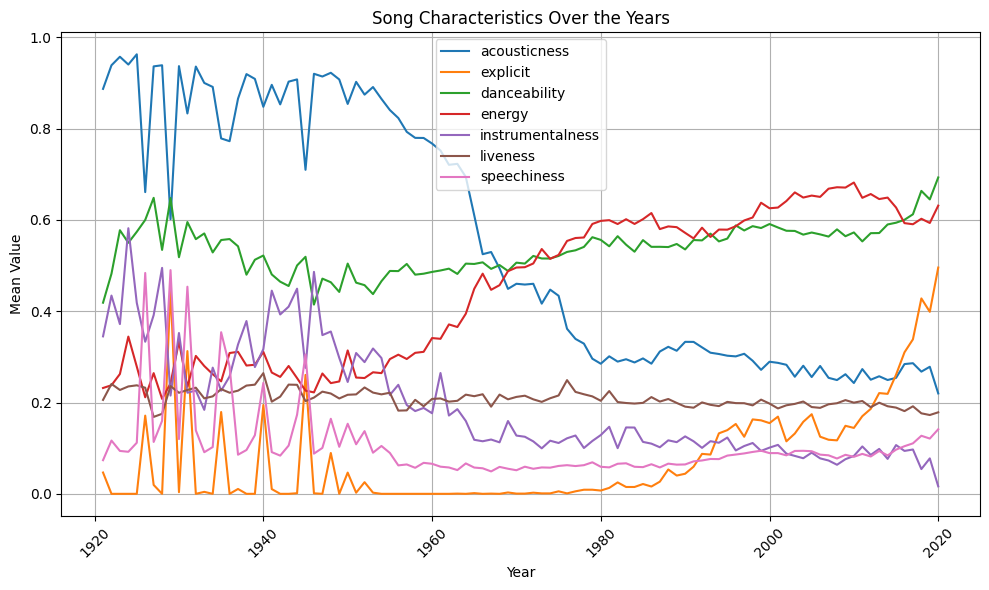

In [ ]:
characteristics = ['acousticness', 'explicit', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
plt.figure(figsize=(10, 6))

for characteristic in characteristics:
    plt.plot(data.groupby('year')[characteristic].mean(), linestyle='-', label=characteristic)

plt.title('Song Characteristics Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


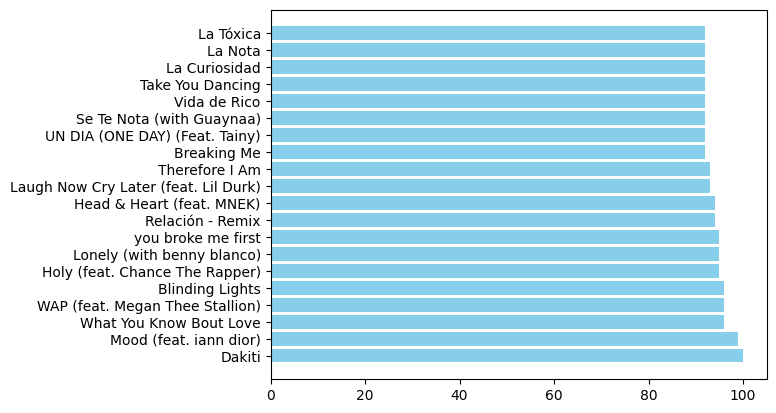

In [ ]:

popular = data.groupby("name")['popularity'].mean().sort_values(ascending=False).head(20)
axis = plt.barh(popular.index, popular.values, color='skyblue', )

In [ ]:
# import pprint

# # Pearson Correlation Coefficient
# features = [
#     "valence", "year", "acousticness", "danceability", "energy", "instrumentalness", "liveness",
#     "speechiness", "tempo", "duration_minutes"]

# res = []

# for i in features:
#     for j in features:
#         if i == j: continue 
#         res.append((i, j, np.corrcoef(data[i], data[j])))


data1 = data.corr('pearson')
data1[['RESULT']].plot(kind='hist')
# pprint.pprint(res, width=50)

[('valence',
  'year',
  array([[ 1.        , -0.02824511],
       [-0.02824511,  1.        ]])),
 ('valence',
  'acousticness',
  array([[ 1.        , -0.18410103],
       [-0.18410103,  1.        ]])),
 ('valence',
  'danceability',
  array([[1.        , 0.55894648],
       [0.55894648, 1.        ]])),
 ('valence',
  'energy',
  array([[1.        , 0.35387598],
       [0.35387598, 1.        ]])),
 ('valence',
  'instrumentalness',
  array([[ 1.        , -0.19850097],
       [-0.19850097,  1.        ]])),
 ('valence',
  'liveness',
  array([[1.        , 0.00383236],
       [0.00383236, 1.        ]])),
 ('valence',
  'speechiness',
  array([[1.        , 0.04638098],
       [0.04638098, 1.        ]])),
 ('valence',
  'tempo',
  array([[1.       , 0.1716886],
       [0.1716886, 1.       ]])),
 ('valence',
  'duration_minutes',
  array([[ 1.        , -0.19180537],
       [-0.19180537,  1.        ]])),
 ('year',
  'valence',
  array([[ 1.        , -0.02824511],
       [-0.02824511,  1.    

In [ ]:



fig, ax = plt.subplots()
im = ax.imshow(res[0][2])

# Set the tick labels
ax.set_xticks(np.arange(len(data[0][0])))
ax.set_yticks(np.arange(len(data[0][1])))
ax.set_xticklabels(data[0][0])
ax.set_yticklabels(data[0][1])

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(data[0][0])):
    for j in range(len(data[0][1])):
        text = ax.text(j, i, data[0][2][i, j], ha="center", va="center", color="w")

ax.set_title("Correlation Coefficient")
fig.tight_layout()